In [6]:
import numpy as np
import matplotlib.pyplot as plt 
from performance_simulation import *

In [7]:
#General parameters
years = 10
time = int(261 * years)


#Import parameters
n = int(261 * np.random.uniform(0, 15))
path = "data/MSCI_World.csv"
limit = slice(n, time+n)


#Trade parameters
trades = 10 * years
max_trades = 20 * years
hold_time = 30
time_after_reversel = 0
smooth_period = 20

trade_coast = 1
spread = 0.002
tax_rate = 0.25
tax_allowance = 1000

initial_investment = 5000
saving_plan = 00
saving_plan_period = 22


chim =  ChartImport(  initial_investment=initial_investment, saving_plan=saving_plan, saving_plan_period=saving_plan_period, time=time, 
                      trades=trades, max_trades=max_trades, hold_time=hold_time, time_after_reversel=time_after_reversel, smooth_period=smooth_period, trade_coast=trade_coast, spread=spread, tax_rate=tax_rate, tax_allowance=tax_allowance
                      )

performance, dates = chim.load_data(path=path, limit=limit)

buy_and_hold_performance = chim.buy_and_hold(set='data')[0]
random_swing_performance_analyse = chim.random_swing_trade_ana(set='data')[0]
swing_performance_analyse = chim.swing_trade_ana(set='data')[0]


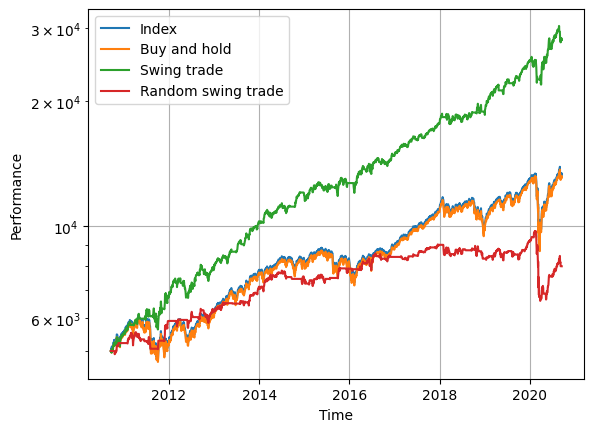

Initial invetment:  5000
Total Investment:  5000

Index performance:
    Absolute: 13306.15, Relative: 2.66
    Yearly performance: 1.1

Buy and hold return:
    Absolute: 13100.41, Relative: 2.62
    Yearly performance: 1.1, Internal rate of return: 1.1
    Taxes: 0, Transaction cost: 11.0

Swing trade return:
    Absolute: 28136.22, Relative: 5.63
    Yearly performance: 1.19, Internal rate of return: 1.19
    Taxes: 5293.44, Transaction cost: 1353.03

Random swing trade return:
    Absolute: 8005.94, Relative: 1.6
    Yearly performance: 1.05, Internal rate of return: 1.05
    Taxes: 160.15, Transaction cost: 1693.56



In [8]:
plt.plot(dates, performance, label="Index")
plt.plot(dates, buy_and_hold_performance, label="Buy and hold")
plt.plot(dates, swing_performance_analyse, label="Swing trade")
plt.plot(dates, random_swing_performance_analyse, label="Random swing trade")
#plt.axhline(1, color="black", linestyle="--")   

plt.xlabel("Time")
plt.ylabel("Performance")

plt.grid()
plt.legend()

plt.yscale("log")

plt.show()

#chim.print_parameters()
chim.print_results()
#chim.plot_performance()

In [9]:
mc = MonteCarloSimulation(chartimp=chim, parallel=True)
_ = mc.mc_import_chart(n=2000, stepsize=2, path=path, limit=limit)

# mc.hist_performance(limits=None, bins=30)

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [02:57<00:00, 11.27it/s]


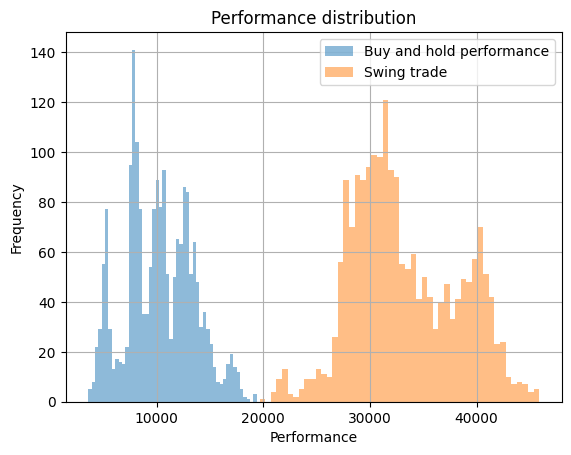

Initial invetment:  5000
Total money invested:  5000

Index performance:
  Overall return: 10282.367 +/- 3184.262 (Median: 10220.659)
  Relative performance: 2.056 +/- 0.637 (Median: 2.044)
  Yearly performance: 1.07 +/- 0.036 (Median: 1.074)

Buy and hold return:
  Overall return: 10258.631 +/- 3176.1 (Median: 10169.134)
  Relative performance: 2.052 +/- 0.635 (Median: 2.034)
  Yearly performance: 1.069 +/- 0.036 (Median: 1.074)
  Internal rate of return: 1.069 +/- 0.036 (Median: 1.074)
  Taxes: 0.0 +/- 0.0 (Median: 0.0)
  Transaction cost: 10.998 +/- 0.0 (Median: 10.998)

Swing trade return:
  Overall return: 33220.661 +/- 4948.544 (Median: 32178.098)
  Relative performance: 6.644 +/- 0.99 (Median: 6.436)
  Yearly performance: 1.207 +/- 0.018 (Median: 1.205)
  Internal rate of return: 1.207 +/- 0.018 (Median: 1.205)
  Taxes: 6553.214 +/- 1639.686 (Median: 6305.459)
  Transaction cost: 1422.498 +/- 218.778 (Median: 1392.358)

Random swing trade return:
  Overall return: 5578.171 +/- 1

In [10]:
bins=50
limits=None

#plt.hist(mc.index_performance, bins=bins, range=limits, alpha=0.5, label="Index Performance")
plt.hist(mc.buy_and_hold_profit, bins=bins, range=limits, alpha=0.5, label="Buy and hold performance")
plt.hist(mc.swing_profit, bins=bins, range=limits, alpha=0.5, label="Swing trade")
#plt.hist(mc.random_swing_profit, bins=bins, range=limits, alpha=0.5, label="Random swing trade")

plt.xlabel("Performance")
plt.ylabel("Frequency")
plt.title("Performance distribution")

plt.grid()
plt.legend()
plt.show()

mc.print_results(accuracy=3)

In [11]:
mc.chartsim